# MVP Machine Learning

**Nome:** Kaio Santos de Farias

**Matrícula:** 4052025000452

**Dataset:** [Customer Churn Dataset](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset)

## OBSERVAÇÃO IMPORTANTE: tempo de execução completa do dataset pode chegar a cerca de ~12 a ~15 min.

Dado o tamanho da base e uso de múltiplos modelos, a partir do ambiente disponibilizado na versão gratuita do Colab, todo o processo de execução pode ser de até 15 min. Foram feitas algumas escolhas no processo com foco em reduzir o tempo de execução, ainda que sem afetar os resultados (tipos de modelo testados, número de folds e configurações de teste de hiperparâmetros)

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

#1. Introdução

- Qual é a descrição do problema?

Churn (ou abandono) é um problema que afeta muitos negócios, e tem impacto especialmente naqueles que operam em um modelo de assinatura como forma de garantia de receita recorrente. Dessa forma, é comum que negócios do tipo busquem formas de identificar usuários com maior tendência a abandonar ou cancelar o serviço, para aplicar táticas de reengajamento e inibir a interrupção do serviço, garantindo a manutenção das fontes de receita.

A partir deste dataset, a ideia é construir um modelo que permita a identificação dos usuários com maior tendência ou risco de churn, a partir de uma base que composta dos principais indicadores sobre o relacionamento do cliente com a empresa.

- Que restrições ou condições foram impostas para selecionar os dados?

  - O modelo deve operar da maneira mais otimizada, limitando o consumo de recursos
  - O modelo deve ser rodado mensalmente, identificando os usuários com maior risco

- Tipo de Problema

Este é um problema de aprendizado supervisionado, com foco em classificação. A partir da "fotografia" que resume os principais indicadores do reclacionamento dos clientes, busca-se determinar se esse cliente está ou não inclinado a cancelar o serviço.

## Carregamento dos Dados

O dataset está disponível no Kaggle, com levantamento realizado pelo usuário Muhammad Shahid Azeem, e licença de domínio público disponível para usos diversos. Portanto, não é necessário relaizar seleção dos dados, apenas o tratamento e limpeza (nas etapas a seguir).



In [3]:
# Definição do caminho
file_path = "https://raw.githubusercontent.com/kaiosfarias/puc_rio_mvp02/refs/heads/main/customer_churn_dataset_merged.csv"

# Importa o dataset do github
df = pd.read_csv(file_path)

In [4]:
df.shape

(505207, 12)

# 2. Visão geral do dataset

O data set é composto de 505.207 entradas, com 12 colunas. os dados presentes são:


- CustomerID - Identificador único do cliente
- Age - idade em anos do cliente
- Gender - Gênero do cliente
- Tenure - Tem de assinatura em meses
- Usage Frequency - classificação de frequencia de uso, de 0 a 30 (assumimos que corresponde a média do número de utilizações mensais)
- Support Calls - Número de ligações ao suporte durante o tempo de assinatura
- Payment Delay - Número de ocorrências de ocorrências de atraso de pagamento
- Subscription Type - Classificação do tipo de assunatura
- Contract Length - Modalidade do tipo de contrato  
- Total Spend - Valor total gasto no período de contratação
- Last Interaction - número de dias desde a última interação
- Churn - Identificador binário de churn


###Limpeza simplificada
Ainda que o dataset tenha ótimas notas em relação ao consistência e completude no Kaggle, vamos avaliar se existem nulos ou inconsistência nas informações.

In [5]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [6]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


Não existem valores nulos no dataset. Além disso, a partir dos valores gerados via o método describe os valores presentes parecem estar dentro de um range aceitável para cada categoria.

###Análise inicial

- Qual a proporção de cancelamentos?
- Qual a relação entre tenure e cancelamentos?
- Qual a relação entre valor gasto e cancelamentos?
- Qual a relação entre atraso de pagamentos e cancelamentos?
- Qual a relação entre qual a relação entre a última interação e o cancelamento?

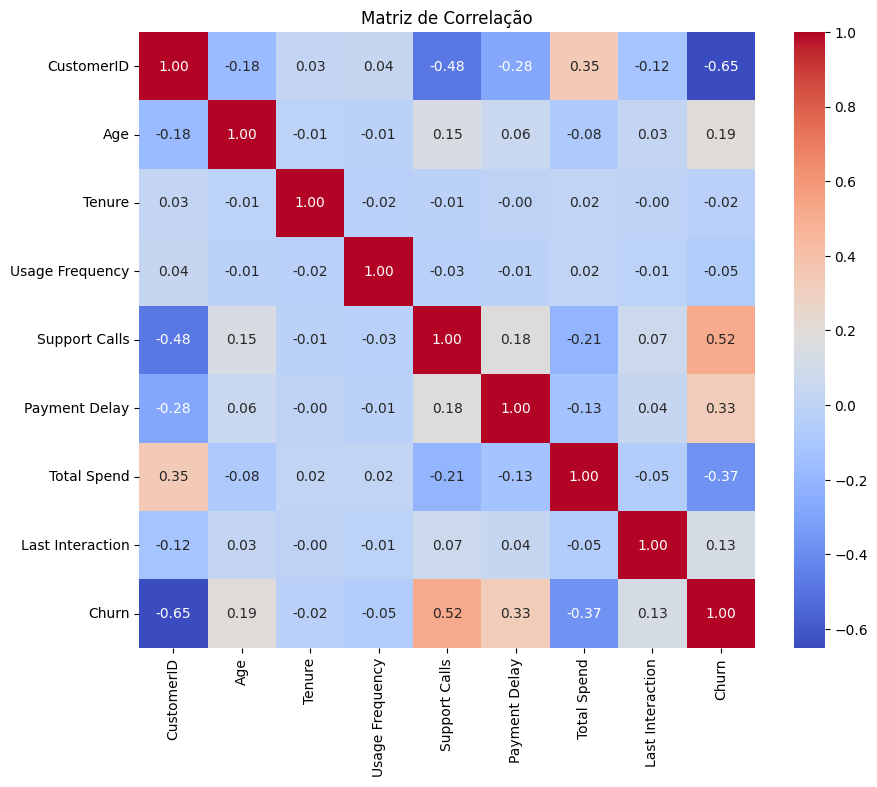

In [7]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Matriz de Correlação')
plt.show()

* Analisando rapidamente a matriz de correlação entre os dados numéricos presentes no dataset, chama atenção algumas índices em comparação com o valor churn, como: Suport Calls (correlação positiva acima de 0.5). Payment delay possui correlação média (0.33 positiva) e Total Spend possui correlação média negativa.

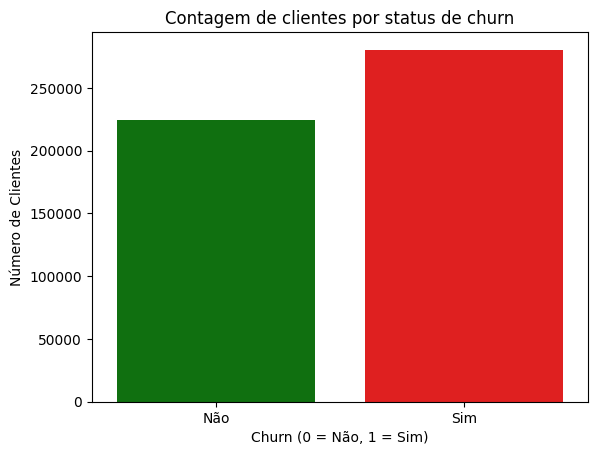

In [8]:
sns.countplot(data=df, x='Churn', hue = 'Churn', legend = False, palette=['green', 'red'])
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Número de Clientes')
plt.title('Contagem de clientes por status de churn')
plt.xticks([0,1], ['Não', 'Sim'])
plt.show()

* Chama atenção o fato de que o dataset selecionado possui maior proporção de usuários que abandonaram o serviço, do que os que se mantiveram.

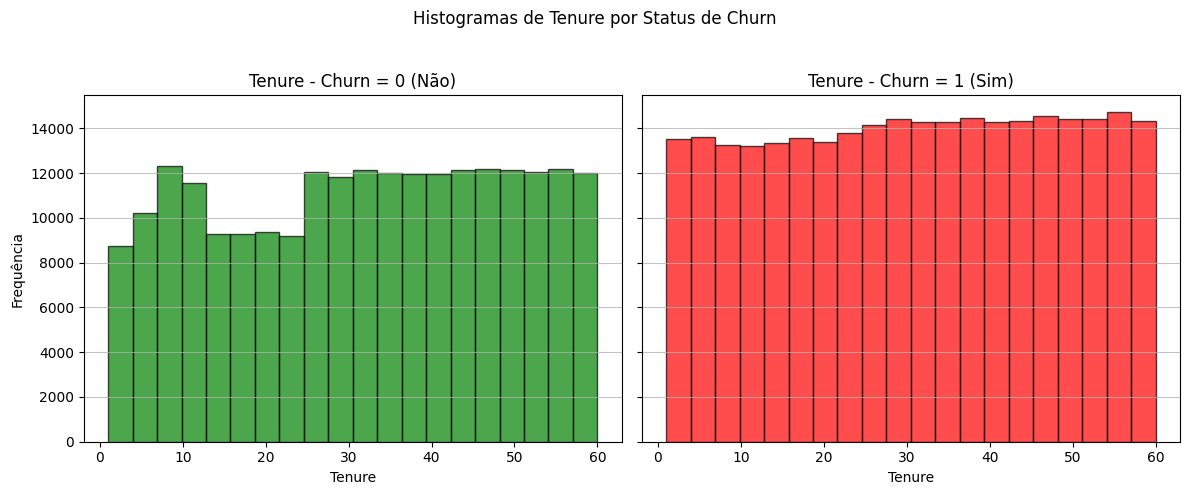

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histograma para churn = 0
axes[0].hist(df[df['Churn'] == 0]['Tenure'], bins=20, color='green', alpha=0.7, edgecolor='black')
axes[0].set_title('Tenure - Churn = 0 (Não)')
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Frequência')
axes[0].grid(axis='y', alpha=0.75)

# Histograma para churn = 1
axes[1].hist(df[df['Churn'] == 1]['Tenure'], bins=20, color='red', alpha=0.7, edgecolor='black')
axes[1].set_title('Tenure - Churn = 1 (Sim)')
axes[1].set_xlabel('Tenure')
axes[1].grid(axis='y', alpha=0.75)

plt.suptitle('Histogramas de Tenure por Status de Churn')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

* Quando observamos os histogramas de Tenure, estratificados entre usuários que abandonaram ou não o serviço, as distribuições parecem semelhantes, com execeção a uma janela entre aproximadamente 11 e 24 meses, onde parece haver menor concentração de usuários ativos na fotografia da base. Isso pode indicar oportunidades de investigação futura.

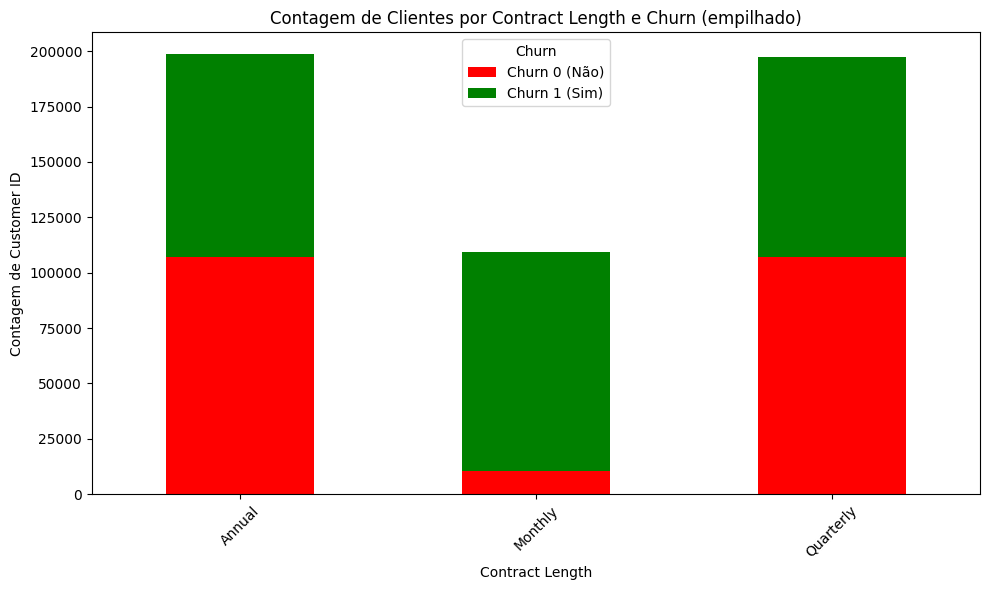

In [10]:
grouped = df.groupby(['Contract Length', 'Churn'])['CustomerID'].count().unstack(fill_value=0)


ax = grouped.plot(kind='bar', stacked=True, color={0: 'red', 1: 'green'}, figsize=(10,6))

plt.xlabel('Contract Length')
plt.ylabel('Contagem de Customer ID')
plt.title('Contagem de Clientes por Contract Length e Churn (empilhado)')
plt.legend(['Churn 0 (Não)', 'Churn 1 (Sim)'], title='Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

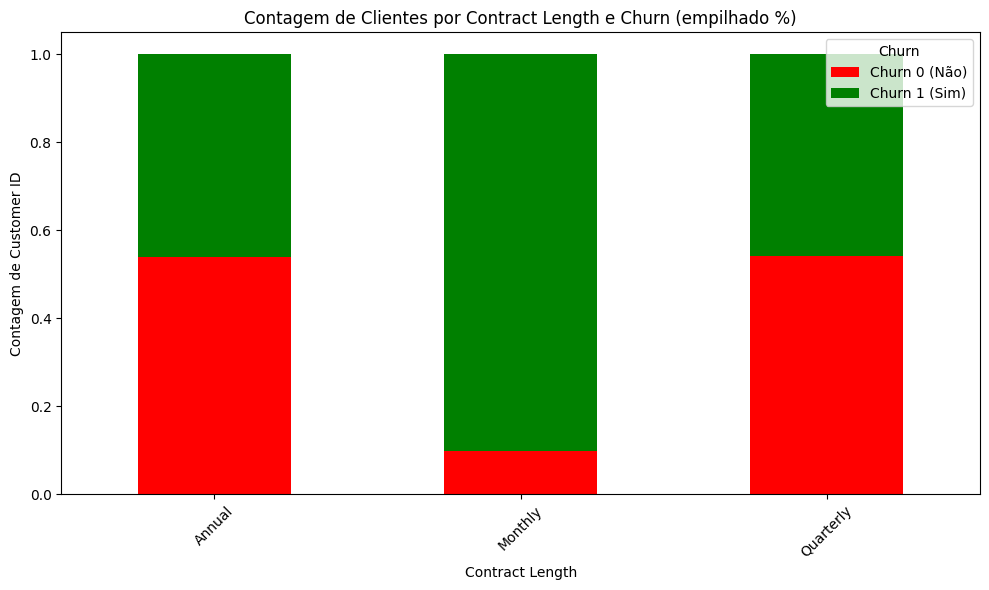

In [11]:
grouped_counts = df.groupby(['Contract Length', 'Churn'])['CustomerID'].count().unstack(fill_value=0)
grouped_sum = grouped_counts.sum(axis=1)
grouped_normalized = grouped_counts.divide(grouped_sum, axis=0)


ax = grouped_normalized.plot(kind='bar', stacked=True, color={0: 'red', 1: 'green'}, figsize=(10,6))

plt.xlabel('Contract Length')
plt.ylabel('Contagem de Customer ID')
plt.title('Contagem de Clientes por Contract Length e Churn (empilhado %)')
plt.legend(['Churn 0 (Não)', 'Churn 1 (Sim)'], title='Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Observando a relação entre o tipo de pagamento (anual, trimestral ou mensal), tanto do ponto de vista de usuários totais e proporcionalmente, notasse uma menor parcela de abandono nos planos mensais - No entando, esse tipo de plano corresponde a uma parcela menor de usuários no dataset.

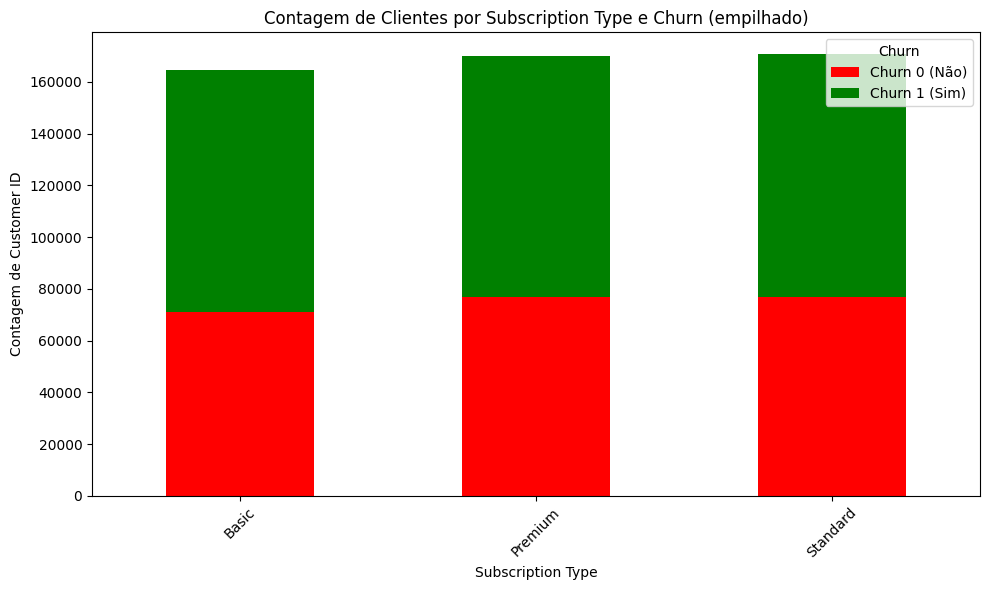

In [12]:

grouped = df.groupby(['Subscription Type', 'Churn'])['CustomerID'].count().unstack(fill_value=0)

ax = grouped.plot(kind='bar', stacked=True, color={0: 'red', 1: 'green'}, figsize=(10,6))

plt.xlabel('Subscription Type')
plt.ylabel('Contagem de Customer ID')
plt.title('Contagem de Clientes por Subscription Type e Churn (empilhado)')
plt.legend(['Churn 0 (Não)', 'Churn 1 (Sim)'], title='Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

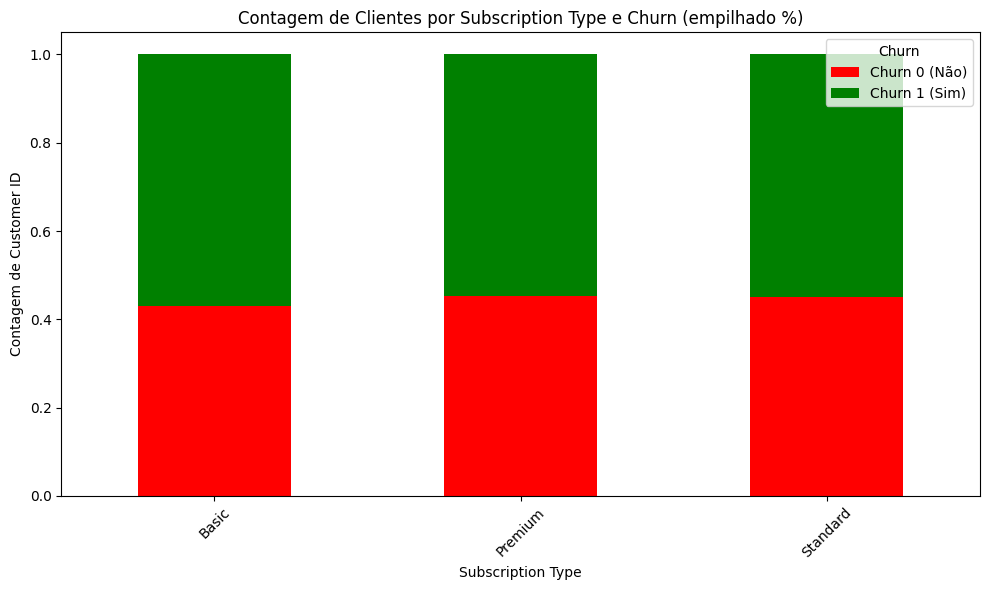

In [13]:
grouped_counts = df.groupby(['Subscription Type', 'Churn'])['CustomerID'].count().unstack(fill_value=0)
grouped_sum = grouped_counts.sum(axis=1)
grouped_normalized = grouped_counts.divide(grouped_sum, axis=0)

# Plot empilhado (stacked)
ax = grouped_normalized.plot(kind='bar', stacked=True, color={0: 'red', 1: 'green'}, figsize=(10,6))

plt.xlabel('Subscription Type')
plt.ylabel('Contagem de Customer ID')
plt.title('Contagem de Clientes por Subscription Type e Churn (empilhado %)')
plt.legend(['Churn 0 (Não)', 'Churn 1 (Sim)'], title='Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Por outro lado, a mesma visão quando analisada utilizando a quebra por Subscription type, não apresenta grandes diferenças entre os tupos diferentes de plano.

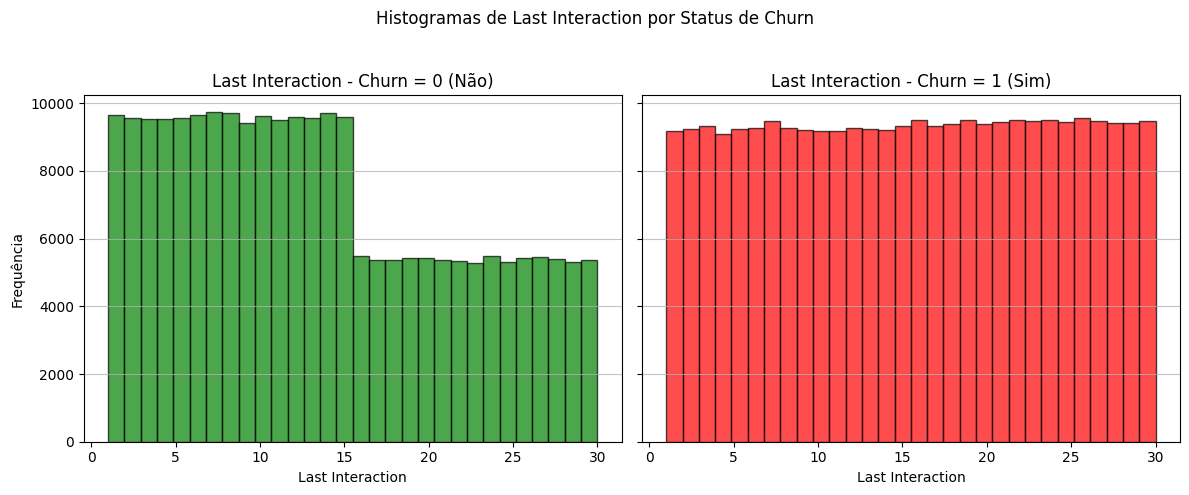

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histograma para churn = 0
axes[0].hist(df[df['Churn'] == 0]['Last Interaction'], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[0].set_title('Last Interaction - Churn = 0 (Não)')
axes[0].set_xlabel('Last Interaction')
axes[0].set_ylabel('Frequência')
axes[0].grid(axis='y', alpha=0.75)

# Histograma para churn = 1
axes[1].hist(df[df['Churn'] == 1]['Last Interaction'], bins=30, color='red', alpha=0.7, edgecolor='black')
axes[1].set_title('Last Interaction - Churn = 1 (Sim)')
axes[1].set_xlabel('Last Interaction')
axes[1].grid(axis='y', alpha=0.75)

plt.suptitle('Histogramas de Last Interaction por Status de Churn')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

* Por fim, avaliando os histogramas estratificados de dias até a última interação, ao paso em que os usuários com churn estão proporcionalmente distribuídos em toda a amostra, chama atenção uma redução maior na concentração de usuários ativos onde a última interação ocorreu a mais de 15 dias, o que pode indicar uma relação com o comportamento de abandono.

###Conclusão e hipóteses iniciais



Hipóteses iniciais:

- Considerando as visões avaliaddas, acreditamos que as seguintes colunas podem ter maior importância no modelo a ser construído:
    - Last Interaction
    - Contract Lenght
    - Total Spend
    - Tenure

Essa hipótese será validada na etapa de feature selection.

#3. Preparação dos dados

**Preparação de Dados**

*Objetivo: realizar operações de preparação dos dados.*

- Separe o dataset entre treino e teste (e validação, se aplicável).
- Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.
- Verifique quais operações de transformação de dados (como normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.
- Refine a quantidade de atributos disponíveis, realizando o processo de *feature selection* de forma adequada.



In [15]:
# Preparação dos dados

# Identify and count unknown values in the 'Churn' column
unknown_churn_count = df['Churn'].isnull().sum()
print(f"Number of unknown churn values: {unknown_churn_count}")

# Exclude rows with unknown churn values
df_cleaned = df.dropna(subset=['Churn']).copy()

# Separação em bases de treino e teste (holdout)
array = df_cleaned.values
X = array[:,0:10] # atributos
y = array[:,11] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

Number of unknown churn values: 1


In [16]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(X_train[:, [2, 7, 8]])

X_train_encoded = ohe.transform(X_train[:, [2, 7, 8]])
X_test_encoded = ohe.transform(X_test[:, [2, 7, 8]])

X_train_numerico = X_train[:, [0, 1, 3, 4, 5, 6, 9]]
X_test_numerico = X_test[:, [0, 1, 3, 4, 5, 6, 9]]

X_train_final = np.concatenate([X_train_numerico, X_train_encoded], axis=1)
X_test_final = np.concatenate([X_test_numerico, X_test_encoded], axis=1)

Realizaremos a normalização dos dados.

In [17]:
#Normalização dos dados

scaler = MinMaxScaler()

X_train_scaled_array = scaler.fit_transform(X_train_final)
X_test_scaled_array = scaler.transform(X_test_final)

# Reconstruct column names
numeric_cols = df.columns[[0, 1, 3, 4, 5, 6, 9]].tolist()
encoded_cols = ohe.get_feature_names_out(['Gender', 'Subscription Type', 'Contract Length']).tolist()
all_cols = numeric_cols + encoded_cols

# Create DataFrames with reconstructed column names and original index
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=all_cols, index=df.index[:len(X_train_scaled_array)])
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=all_cols, index=df.index[:len(X_test_scaled_array)])

In [18]:
X_train_scaled

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,0.779776,0.510638,0.237288,0.655172,0.2,0.000000,0.679278,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.880830,0.531915,0.457627,0.827586,0.0,0.633333,0.935811,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.321538,0.936170,0.542373,0.000000,0.4,0.233333,0.683333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.899750,0.510638,0.033898,0.517241,0.2,0.233333,0.869222,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.744472,0.574468,0.847458,0.827586,0.4,0.533333,0.447600,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404159,0.390027,0.595745,0.271186,0.551724,0.8,0.033333,0.307778,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
404160,0.023871,0.744681,0.186441,0.172414,0.0,0.000000,0.691111,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
404161,0.110421,0.468085,0.050847,0.517241,0.8,0.733333,0.592222,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
404162,0.287311,0.617021,0.542373,0.724138,0.1,0.800000,0.254444,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [19]:
# Feature Selection
#Métodod 1 -  Extra Trees Classifier

X_train_scaled.fillna(X_train_scaled.mean(), inplace=True)
X_test_scaled.fillna(X_test_scaled.mean(), inplace=True)

y_train = y_train.astype(float)

print("Unique values in y_train:", np.unique(y_train))
print("Number of NaNs in y_train:", np.sum(np.isnan(y_train)))

nan_indices = np.isnan(y_train)
X_train_scaled = X_train_scaled[~nan_indices]
y_train = y_train[~nan_indices]

print("\nNumber of NaNs in y_train after removal:", np.sum(np.isnan(y_train)))

model = ExtraTreesClassifier(n_estimators=100, random_state=7)

model.fit(X_train_scaled, y_train)

# Resultado
print("Feature Importances:")
for name, importance in zip(X_train_scaled.columns, model.feature_importances_):
    print(f"{name}: {importance:.4f}")

#Método 2 - K Best
k_best_features = SelectKBest(score_func=f_classif, k=10) # Using f_classif for classification
fit = k_best_features.fit(X_train_scaled, y_train)
selected_feature_indices = fit.get_support(indices=True)
selected_features = X_train_scaled.columns[selected_feature_indices]

print("\nSelected Features (SelectKBest):", selected_features.tolist())



Unique values in y_train: [0. 1.]
Number of NaNs in y_train: 0

Number of NaNs in y_train after removal: 0
Feature Importances:
CustomerID: 0.3811
Age: 0.0697
Tenure: 0.0330
Usage Frequency: 0.0295
Support Calls: 0.1768
Payment Delay: 0.0876
Total Spend: 0.1018
Gender_Female: 0.0070
Gender_Male: 0.0090
Subscription Type_Basic: 0.0021
Subscription Type_Premium: 0.0020
Subscription Type_Standard: 0.0021
Contract Length_Annual: 0.0117
Contract Length_Monthly: 0.0752
Contract Length_Quarterly: 0.0115

Selected Features (SelectKBest): ['CustomerID', 'Age', 'Support Calls', 'Payment Delay', 'Total Spend', 'Gender_Female', 'Gender_Male', 'Contract Length_Annual', 'Contract Length_Monthly', 'Contract Length_Quarterly']


A partir dos dois métodos testados, vamos seguir com o uso das seguintes features:
'Age'
'Support Calls',
'Payment Delay',
'Total Spend',
'Gender_Female',
'Gender_Male',
'Contract Length_Annual',
'Contract Length_Monthly',
'Contract Length_Quarterly'

In [20]:
# Separando os dados selecionados para alimentar o modelo

selected_features = [
    'Age',
    'Support Calls',
    'Payment Delay',
    'Total Spend',
    'Gender_Female',
    'Gender_Male',
    'Contract Length_Annual',
    'Contract Length_Monthly',
    'Contract Length_Quarterly'
]

X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)

Shape of X_train_selected: (404164, 9)
Shape of X_test_selected: (101042, 9)


#4. Modelagem e Treinamento


**Modelagem e treinamento:**

*Objetivo: construir modelos para resolver o problema em questão.*

* Os modelos escolhidos para a avaliação foram:
KNN, Decision Tree, Random Forest, AdaBoost e Logistic Regression.

Equanto AdaBosst e Random Forest avaliam ensembles os demais foram amplamente testado nas aulas para exemplos de classificação, além de rankearem muito bem em diversas competições documentadas.

Observação: durante a execução do treinamento executamos algumas tentativas de inclusão de um modelo de Máquina de Vetores de Suporte (SVM). No entando, mesmo com a redução do número de partições para a validação cruzada, ao entrar no treinamento deste modelo o código entrava em um loop infinito e não concluía o treinamento.

In [21]:
# Criando os folds para a validação cruzada
num_particoes = 5 # número de folds da validação cruzada reduzido para acelerar o processo
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 5 folds

KNN: 0.912902 (0.000508)
CART: 0.864196 (0.001129)
RF: 0.922455 (0.000282)
AB: 0.865201 (0.000636)
LR: 0.845125 (0.001205)


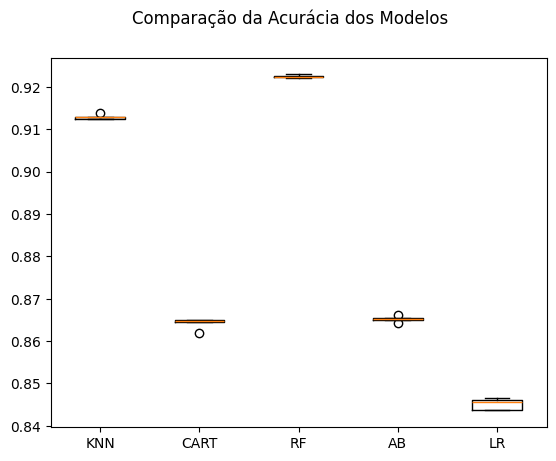

In [22]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('LR', LogisticRegression(max_iter=1000)))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

É possível que devido a redução no número de folds e a semelhança dos resultados entre as execuções, os boxplots tenham resultado em uma visão menos dispersa para cada modelo. No entanto, a partir da visão resultante e dos dados de média e desvio padrão da acurária, identificamos **o classificador Random Forest como o modelo de melhor performance para o problema.**

#5. Avaliação dos resultados


**Avaliação de Resultados:**

Para o modelo selecionado, utilizaremos as seguintes me'tricas de avaliação:

* Acurácia: Percentual de classificações corretas no geral. Pode ser pouco informativa em casos de classes desbalanceadas (quando churn é raro).

* Precisão (Precision): Dos clientes que o modelo previu que iriam churnar, quantos realmente churnaram? Importante para evitar ações desnecessárias sobre clientes saudáveis.

* Recall (Sensibilidade): Dos clientes que realmente churnaram, quantos o modelo conseguiu identificar? Essencial para capturar o máximo de churns reais possível.

* F1-Score: Harmônica entre precisão e recall, oferece um balanço entre os dois, útil quando há desbalanceamento e ambos os erros têm custos.



In [23]:
# Criando um modelo com todo o conjunto de treino
model = RandomForestClassifier()
model.fit(X_train_selected, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test_selected)
y_test = np.array(y_test).astype(int)
predictions = np.array(predictions).astype(int)

In [24]:
# Estimando a acurácia no conjunto de teste
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Acurácia: 0.9225
Precisão: 0.8977
Recall: 0.9710
F1-Score: 0.9329


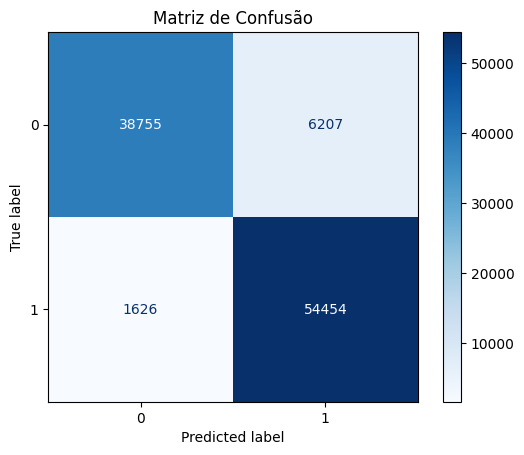

In [25]:
# Visualização da Matriz de confusão
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

Após uma primeira execução do modelo treinado, obtivemos os resultados a seguir:


Acurácia: 0.9225 — O modelo acertou 92,25% das previsões no conjunto de teste.

Precision: 0.8977 — Das previsões positivas (churn), 89,77% estavam corretas. Baixa taxa de falsos positivos, evita execução de ações sobre clientes que não vão abandonar o serviço.

Recall: 0.9710 — O modelo detectou 97,10% dos clientes que realmente churnaram, o que indica alta sensibilidade.

F1-Score: 0.9329 — Mostra que o modelo tem um bom equilíbrio entre capturar churns reais e evitar falsos alarmes.

Até aqui, entendemos que o modelo tem bons indicadores de performance.

Vamos efetuar alguns exeperimentos de variação de hiperparâmetros, em busca de oportunidade de otimização:

####Otimização de hiperparâmetros:

Vamos avaliar a alteração dos seguintes parâmetros:

* n_estimators: Número de árvores na floresta. Mais árvores geralmente melhoram a performance, mas aumentam o tempo de treinamento.

* max_depth: Profundidade máxima das árvores. Controla o overfitting; valores menores restringem a complexidade.

* min_samples_split: Número mínimo de amostras necessárias para dividir um nó. Aumentar esse valor pode evitar divisões excessivas e overfitting.

* min_samples_leaf: Número mínimo de amostras que um nó folha deve ter. Ajuda a suavizar o modelo e reduzir overfitting.

* max_features: Número máximo de características consideradas para dividir um nó. Controla a aleatoriedade e diversidade das árvores.


Observação: devido aos limites de performanceo no Google Colab durante a execução, configurei um limitador de número de tentativas no processo (n_iter=20) como forma de reduzir o tempo de treinamento/avaliação.  

In [26]:
#Abaixo, definimos a partir do Randomized Search CV para avliar os hiperparˆmetros considerados

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Limita a 20 tentativas
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

random_search.fit(X_train_selected, y_train)
print(f'Melhores hiperparâmetros: {random_search.best_params_}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Melhores hiperparâmetros: {'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 104}


In [27]:
# Criando o modelo com os melhores hiperparâmetros
model = RandomForestClassifier(
    max_depth=21,
    max_features='log2',
    min_samples_leaf=3,
    min_samples_split=13,
    n_estimators=104,
    random_state=42
)

# Execução do modelo treinado
model.fit(X_train_selected, y_train)
predictions = model.predict(X_test_selected)

In [28]:
# Avaliando as métricas
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9282
Precision: 0.8989
Recall: 0.9810
F1-Score: 0.9382


Resultados obtidos a partir da versão otimizada do modelo:

Após uma primeira execução do modelo treinado, obtivemos os resultados a seguir:

Acurácia: 0.9225 -> 0.9282 - Aumento de acurácia em 0,57 p.p.

Precision: 0.8977 -> 0.8989 - Aumento de precisão em 0,12 p.p

Recall: 0.9710 —> 0.9810 - Aumento 1p.p em recall.

F1-Score: 0.9329 —>0.9382 - Aumento de 0,53p.p no F1- Score


Ainda que AAcurácia e Precisão tenham tido um aumento marginal, considerando que o modelo já apresentava bons resultados, a melhoria de Recall(sensibilidade) indica um cenário de melhoria na capacidade do modelo de realmente identificar churns ocorridos, garantindo que em um cenário de aplicação na vida real, seria possível direcionar ações preventivas que buscassem a recuperção antecipada do cliente.

Avaliando a possibilidade de overfitting:

In [30]:
predictions_train = model.predict(X_train_selected)
print("Acurácia Treino:", accuracy_score(y_train, predictions_train))
predictions_test = model.predict(X_test_selected)
print("Acurácia Teste:", accuracy_score(y_test, predictions_test))

Acurácia Treino: 0.9281306598311576
Acurácia Teste: 0.9282080718908968


Ao observar que não há queda drástica na acurácia entre treino e teste, podemos afirmar que não há risco de overfitting a partir do modelo construído.

###Solução final proposta

A partir dos elementos avaliados nos itens anteriores, definimos como solução final:
* Execução do modelo Random Forest para a classificação dos clientes.
* Utilização das features 'Age','Support Calls','Payment Delay','Total Spend','Gender' e 'Contract Length' como variáveis de alimentação do modelo.
* Aplicação dos hiperparâmetros a seguir como otimizadores do treinamento e execução do modelo: Melhores hiperparâmetros:
    * 'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 104